In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('raw_data_airbnb.csv')
df.head(5)

C:\Users\RAJAT\AppData\Local\Temp\ipykernel_17240\542963755.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('raw_data_airbnb.csv')


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [8]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

# data cleaning process 

##### checking missing value.

In [10]:
df.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

# Handling missing values

In [ ]:
#changing  the data types (object to data) cloumn no. = 19.
df['last review'] = pd.to_datetime(df['last review'], errors='coerce')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102349 entries, 0 to 102598
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102349 non-null  int64         
 1   NAME                            102349 non-null  object        
 2   host id                         102349 non-null  int64         
 3   host_identity_verified          102072 non-null  object        
 4   host name                       101949 non-null  object        
 5   neighbourhood group             102322 non-null  object        
 6   neighbourhood                   102333 non-null  object        
 7   lat                             102341 non-null  float64       
 8   long                            102341 non-null  float64       
 9   country                         101822 non-null  object        
 10  country code                    102226 non-null  object      

In [37]:
df.fillna({'reviews per month': 0 , 'last review': df['last review'].min()},inplace=True)

In [38]:
df.dropna(subset = ['NAME','host id'],inplace=True)

In [39]:
df.isnull().sum()

id                                  0
NAME                                0
host id                             0
host_identity_verified            277
host name                         400
neighbourhood group                27
neighbourhood                      16
lat                                 8
long                                8
country                           527
country code                      123
instant_bookable                   97
cancellation_policy                71
room type                           0
Construction year                 205
price                             244
service fee                       273
minimum nights                    403
number of reviews                 182
last review                         0
reviews per month                   0
review rate number                318
calculated host listings count    318
availability 365                  430
dtype: int64

In [40]:
df = df.drop(columns = ['house_rules','license'],errors = 'ignore')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102349 entries, 0 to 102598
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102349 non-null  int64         
 1   NAME                            102349 non-null  object        
 2   host id                         102349 non-null  int64         
 3   host_identity_verified          102072 non-null  object        
 4   host name                       101949 non-null  object        
 5   neighbourhood group             102322 non-null  object        
 6   neighbourhood                   102333 non-null  object        
 7   lat                             102341 non-null  float64       
 8   long                            102341 non-null  float64       
 9   country                         101822 non-null  object        
 10  country code                    102226 non-null  object      

In [42]:
df.head(5)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,620.0,124.0,3.0,0.0,2012-07-11,0.00,5.0,1.0,352.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013.0,577.0,115.0,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0


In [43]:
#removing dollor signs and covert to float.

df['price'] = df['price'].replace('[$,]','',regex=True).astype(float)
df['service fee'] = df['service fee'].replace('[$,]','',regex=True).astype(float)


In [44]:
df.head(5)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,620.0,124.0,3.0,0.0,2012-07-11,0.00,5.0,1.0,352.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013.0,577.0,115.0,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0


# Remove duplicate

In [47]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101808 entries, 0 to 102057
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              101808 non-null  int64         
 1   NAME                            101808 non-null  object        
 2   host id                         101808 non-null  int64         
 3   host_identity_verified          101531 non-null  object        
 4   host name                       101410 non-null  object        
 5   neighbourhood group             101781 non-null  object        
 6   neighbourhood                   101792 non-null  object        
 7   lat                             101800 non-null  float64       
 8   long                            101800 non-null  float64       
 9   country                         101281 non-null  object        
 10  country code                    101685 non-null  object      

# descriptive statistics

In [51]:
df.describe()

,id,host id,lat,long,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.018080e+05,1.018080e+05,101800.000000,101800.000000,101603.000000,101564.000000,101535.000000,101414.000000,101626.000000,101808,101808.000000,101497.000000,101490.000000,101378.000000
mean,2.920168e+07,4.926430e+10,40.728085,-73.949658,2012.489592,625.375015,125.042970,8.108545,27.488940,2018-05-15 03:55:35.219236096,1.162149,3.278836,7.942044,141.062311
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,50.000000,10.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.000000,1.000000,1.000000,-10.000000
25%,1.510860e+07,2.459939e+10,40.688720,-73.982580,2007.000000,340.000000,68.000000,2.000000,1.000000,2017-07-31 00:00:00,0.090000,2.000000,1.000000,3.000000
50%,2.920868e+07,4.912780e+10,40.722290,-73.954440,2012.000000,625.000000,125.000000,3.000000,7.000000,2019-05-22 00:00:00,0.480000,3.000000,1.000000,96.000000
75%,4.329329e+07,7.399769e+10,40.762760,-73.932347,2018.000000,913.000000,183.000000,5.000000,30.000000,2019-07-01 00:00:00,1.710000,4.000000,2.000000,268.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,1.626700e+07,2.853580e+10,0.055856,0.049505,5.765518,331.611632,66.314034,30.325854,49.521772,NaN,1.682869,1.285050,32.276595,135.435164


In [52]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,620.0,124.0,3.0,0.0,2012-07-11,0.00,5.0,1.0,352.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013.0,577.0,115.0,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0


# Visualization

#### 1. What is the distribution of listing prices.

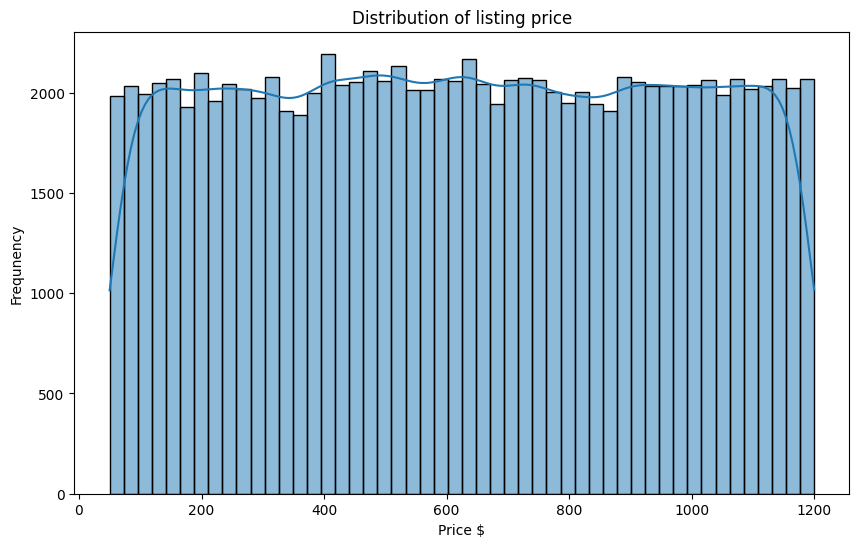

In [ ]:
plt.figure(figsize = (10,6))
sns.histplot(df['price'],bins = 50,kde = True)
plt.title('Distribution of listing price')
plt.xlabel('Price $')
plt.ylabel('Frequnency')
plt.show()

conclution:
the histogram shows a fairly even distribution of 
listing prices across different price ranges,indicating no
particular concentration of listings in any specific price range.
the KDE line helps visualize this even spread more clearly.
confirming that the dataset contains listing with a wide variety of prices.

#### 2. How are different room types distributed.

In [76]:
df['room type'].value_counts()


room type
Entire home/apt    53303
Private room       46188
Shared room         2202
Hotel room           115
Name: count, dtype: int64

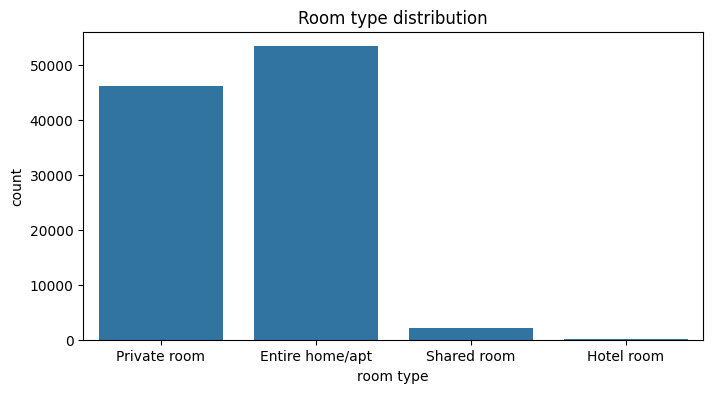

In [80]:
plt.figure(figsize = (8,4))
sns.countplot(data = df, x = 'room type')
plt.title("Room type distribution")
plt.xlabel("room type")
plt.ylabel("count")
plt.show()

#### 3. How are listing distribution across different neighborhoods.

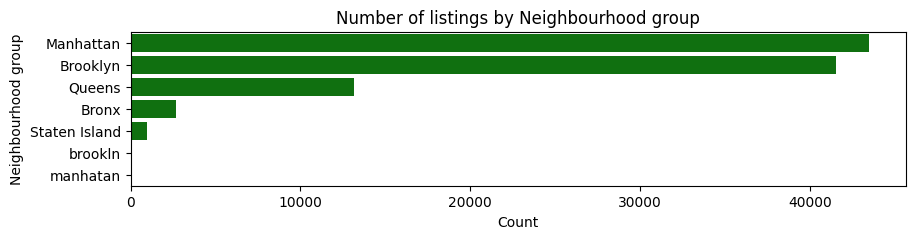

In [89]:
plt.figure(figsize = (10,2))
sns.countplot(data = df, y = 'neighbourhood group',order = df['neighbourhood group'].value_counts().index,color='green')
plt.title("Number of listings by Neighbourhood group")
plt.xlabel("Count")
plt.ylabel("Neighbourhood group")
plt.show()

#### 3. What is the relationship between price and room type.

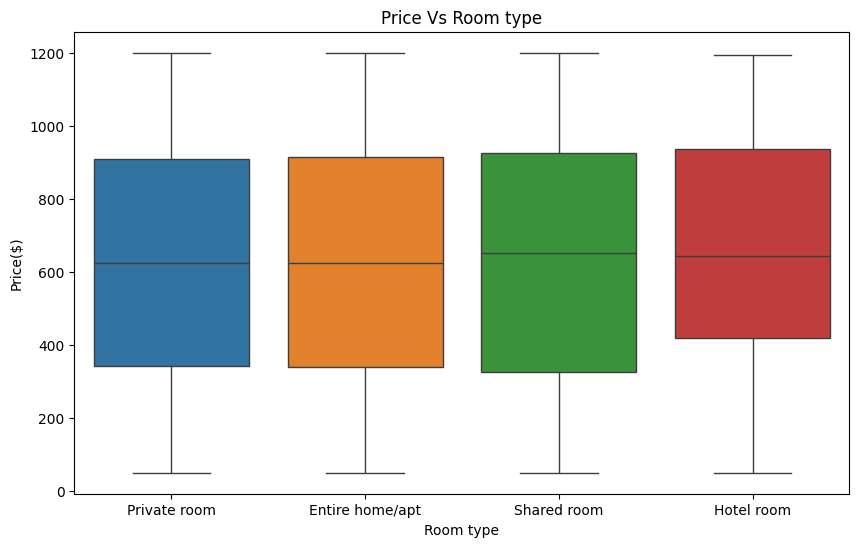

In [92]:
plt.figure(figsize= (10,6))
sns.boxplot(data = df, x = 'room type',y = 'price' , hue = 'room type')
plt.title('Price Vs Room type')
plt.xlabel('Room type')
plt.ylabel('Price($)')
plt.show()

#### 4. How has the number of review change over with time.

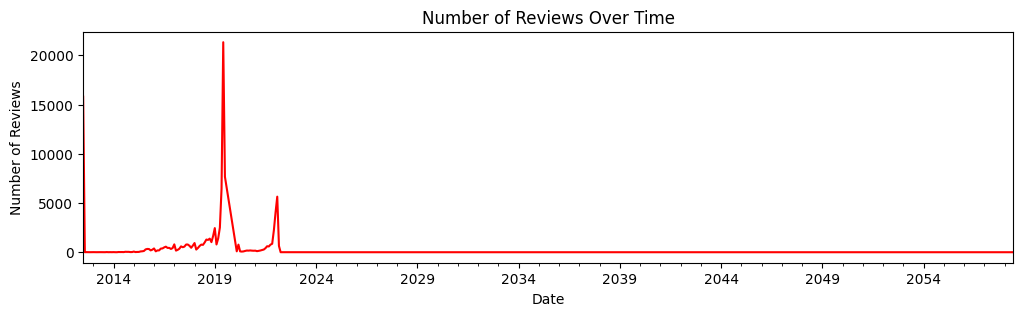

In [96]:
df['last review'] = pd.to_datetime(df['last review'])
reviews_over_time = df.groupby(df['last review'].dt.to_period('M')).size()

plt.figure(figsize=(12, 3))
reviews_over_time.plot(kind='line',color= 'red')
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()